In [42]:
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
import seaborn as sns
from scipy import stats

UsageError: Line magic function `%` not found.


 **Перед тобой датасет некой интернет-компании. Загрузи его в Python, ознакомься с данными и ответь на приведенные ниже вопросы. Для ответа на некоторые из них понадобится произвести расчеты, ход которых опиши в файле с кодом.**
* Какой рекламный канал принёс больше всего дохода за всё время?
* Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)
* Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?
* Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед. Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам понадобятся?
* Если ты нашел что-то еще интересное в данных, то тоже пиши ;) 



In [43]:
# Загружаем файл 
url = 'https://drive.google.com/file/d/16llNk3bEYLaS4ReJ8PBrXQFEehqOPf44/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(dwn_url, encoding='windows-1251')

In [44]:
df

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,ГЌГҐ Г®ГЇГ°ГҐГ¤ГҐГ«ГҐГ­Г®,Г„ГҐГ±ГЄГІГ®ГЇ,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,ГЌГҐ Г®ГЇГ°ГҐГ¤ГҐГ«ГҐГ­Г®,ГЊГ®ГЎГ Г©Г«,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,ГЌГҐ Г®ГЇГ°ГҐГ¤ГҐГ«ГҐГ­Г®,ГЊГ®ГЎГ Г©Г«,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,ГЌГҐ Г®ГЇГ°ГҐГ¤ГҐГ«ГҐГ­Г®,Г„ГҐГ±ГЄГІГ®ГЇ,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,ГЌГҐ Г®ГЇГ°ГҐГ¤ГҐГ«ГҐГ­Г®,Г„ГҐГ±ГЄГІГ®ГЇ,no,no,2159,1000,4110,824,351,62,61861.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52719,2020-06-21,(direct),(none),Г„Г®Г±ГІГ ГўГЄГ ГҐГ±ГІГј,ГЊГ®ГЎГ Г©Г«,yes,yes,65,4,250,50,58,4,4821.0
52720,2020-08-09,co-promo,email,Г„Г®Г±ГІГ ГўГЄГ ГҐГ±ГІГј,ГЊГ®ГЎГ Г©Г«,no,no,43,2,250,50,23,1,7348.0
52721,2020-09-22,google,cpc,Г„Г®Г±ГІГ ГўГЄГ ГҐГ±ГІГј,ГЊГ®ГЎГ Г©Г«,yes,yes,153,3,250,50,58,1,958.0
52722,2020-08-25,(direct),(none),ГЌГҐ Г®ГЇГ°ГҐГ¤ГҐГ«ГҐГ­Г®,ГЊГ®ГЎГ Г©Г«,yes,yes,219,8,250,50,45,1,828.0


In [45]:
# смотрим в каком формате в Датафрейме столбцы
df.dtypes

date                   object
source                 object
medium                 object
delivery_available     object
device_type            object
promo_activated        object
filter_used            object
pageviews               int64
visits                  int64
productClick            int64
addToCart               int64
checkout                int64
transactions            int64
revenue               float64
dtype: object

In [46]:
# меняем данные в столбце date на формат date
df['date'] = pd.to_datetime(df['date'])

In [47]:
# проверяем
df.dtypes

date                  datetime64[ns]
source                        object
medium                        object
delivery_available            object
device_type                   object
promo_activated               object
filter_used                   object
pageviews                      int64
visits                         int64
productClick                   int64
addToCart                      int64
checkout                       int64
transactions                   int64
revenue                      float64
dtype: object

In [48]:
# смотрим количество пропущенных значений
df.isna().sum()

date                  0
source                0
medium                0
delivery_available    0
device_type           0
promo_activated       0
filter_used           0
pageviews             0
visits                0
productClick          0
addToCart             0
checkout              0
transactions          0
revenue               0
dtype: int64

In [49]:
# смотрим дупликаты
df.loc[df.duplicated()]

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue


### Какой рекламный канал принёс больше всего дохода за всё время?

In [53]:
# смотрим какой канал принес больше всего дохода за все время
top_revenue = df.groupby('source', as_index=False)\
    .agg({'revenue': 'sum'})\
    .sort_values('revenue', ascending=False)
top_revenue.head(1)

,source,revenue
21,yandex,467474813.0


### Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

In [54]:
# посчитаем средний чек по датам
avg_bill = df.groupby('date')\
    .agg({'transactions': 'sum', 'revenue': 'sum'})
avg_bill = avg_bill.assign(avg_bill=lambda x: (x.revenue / x.transactions)).round(2)
avg_bill.head()

,transactions,revenue,avg_bill
date,,,
2020-01-01,3107,3528167.0,1135.55
2020-01-02,4208,4867543.0,1156.74
2020-01-03,4260,4978608.0,1168.69
2020-01-04,4549,5338299.0,1173.51
2020-01-05,4498,5300997.0,1178.52


<AxesSubplot:title={'center':'Average Bill per day'}, xlabel='date', ylabel='avg_bill'>

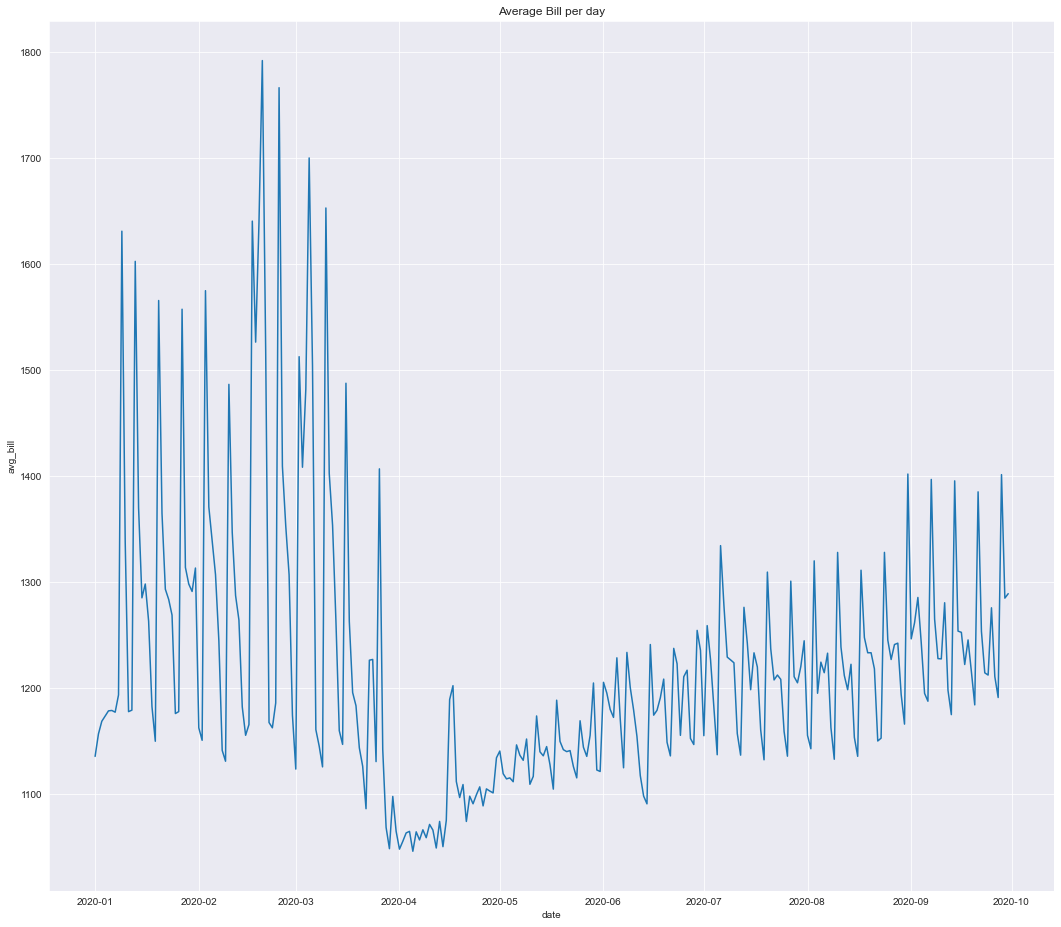

In [55]:
# построим график изминения среднего счета от даты
plt.figure(figsize=(18, 16))
plt.title('Average Bill per day')
sns.lineplot(data=avg_bill, x="date", y="avg_bill")

*На графике наблюдаются большие скачки среднего чека, скорее всего это недельная сезонность, поэтому попробуем сгладить график*

In [56]:
avg_bill['avg_roll'] = avg_bill.avg_bill.rolling(window=7).mean().round(2)

<AxesSubplot:title={'center':'Average Bill per day'}, xlabel='date', ylabel='avg_roll'>

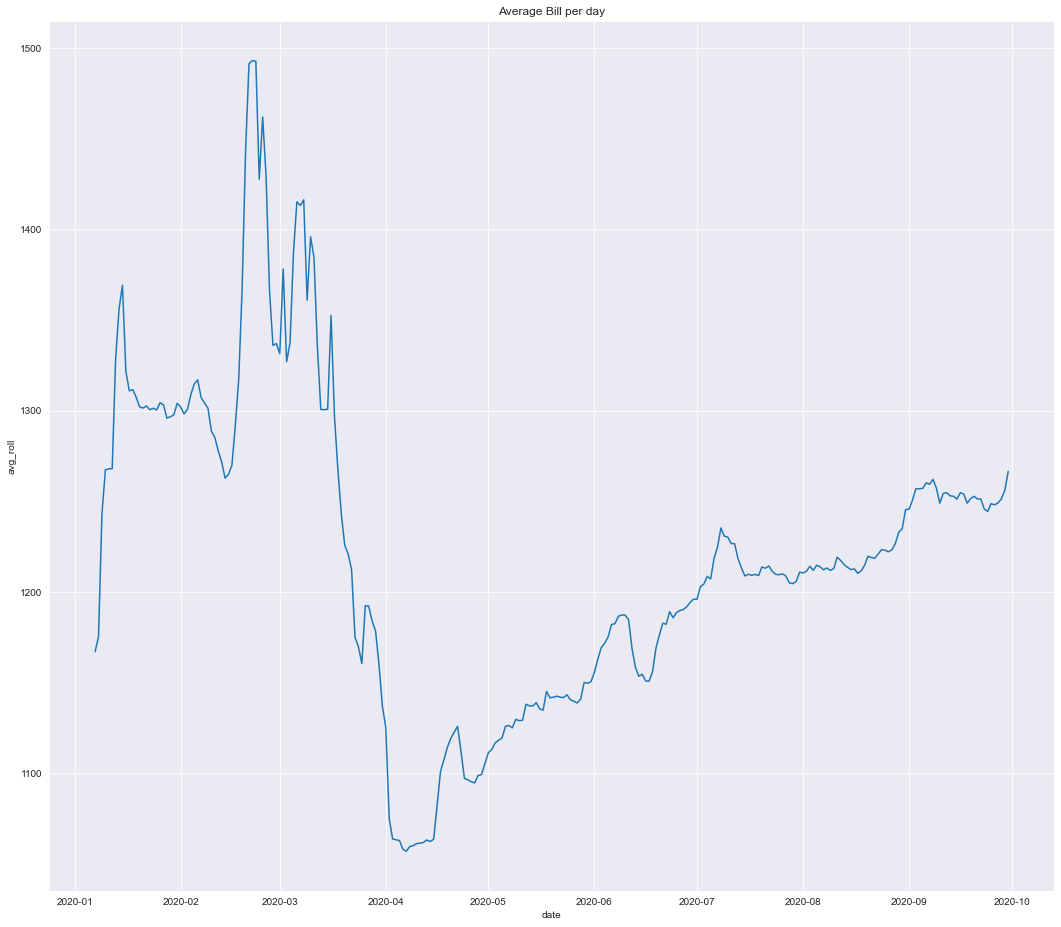

In [57]:
plt.figure(figsize=(18, 16))
plt.title('Average Bill per day')
sns.lineplot(data=avg_bill, x="date", y="avg_roll")

*Из этого графика четко видно, что после введения коронавирусных ограничений в марте 2020 года (29.03.2020). Средний чек упал примерно на 300 и в последующие месяцы наблюдается постепенный рост.*

In [58]:
avg_bill_promo = df.groupby(['date', 'promo_activated'], as_index=False)\
    .agg({'transactions': 'sum', 'revenue': 'sum'})
avg_bill_promo = avg_bill_promo.assign(avg_bill=lambda x: (x.revenue / x.transactions)).round(2)
avg_bill_promo.head()

,date,promo_activated,transactions,revenue,avg_bill
0,2020-01-01,no,1848,2043566.0,1105.83
1,2020-01-01,yes,1259,1484601.0,1179.19
2,2020-01-02,no,2473,2767274.0,1118.99
3,2020-01-02,yes,1735,2100269.0,1210.53
4,2020-01-03,no,2396,2725093.0,1137.35


<AxesSubplot:title={'center':'Average Bill per day'}, xlabel='date', ylabel='avg_bill'>

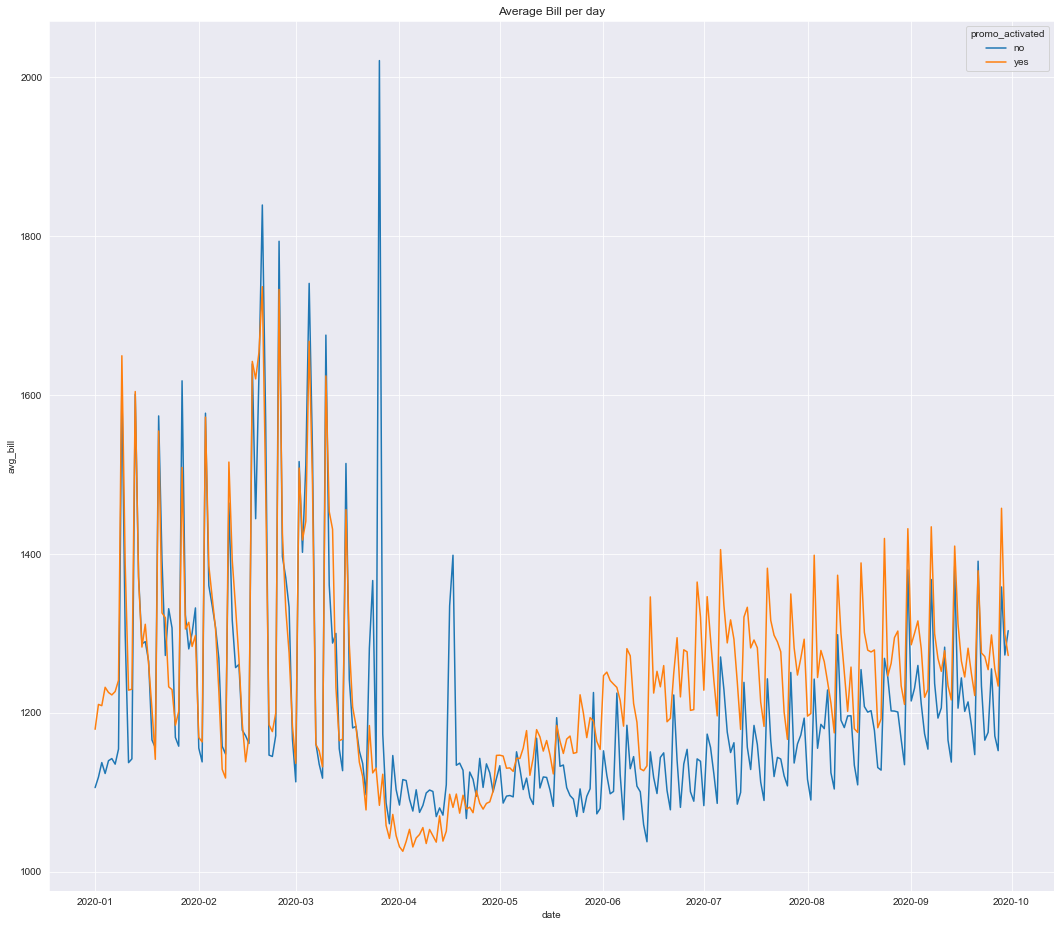

In [59]:
plt.figure(figsize=(18, 16))
plt.title('Average Bill per day')
sns.lineplot(data=avg_bill_promo, x="date", y="avg_bill", hue='promo_activated')


Сложно что-то сказать по этому графику(много скачков), попробуем сгладить графики

In [60]:
avg_bill_YESpromo = df[(df.promo_activated == 'yes')]\
    .groupby('date')\
    .agg({'transactions': 'sum', 'revenue': 'sum'})
avg_bill_YESpromo = avg_bill_YESpromo.assign(avg_bill=lambda x: (x.revenue / x.transactions)).round(2)
avg_bill_YESpromo.head()

,transactions,revenue,avg_bill
date,,,
2020-01-01,1259,1484601.0,1179.19
2020-01-02,1735,2100269.0,1210.53
2020-01-03,1864,2253515.0,1208.97
2020-01-04,2093,2578758.0,1232.09
2020-01-05,2035,2494052.0,1225.58


In [61]:
avg_bill_NOpromo = df[(df.promo_activated == 'no')]\
    .groupby('date')\
    .agg({'transactions': 'sum', 'revenue': 'sum'})
avg_bill_NOpromo = avg_bill_NOpromo.assign(avg_bill=lambda x: (x.revenue / x.transactions)).round(2)
avg_bill_NOpromo.head()

,transactions,revenue,avg_bill
date,,,
2020-01-01,1848,2043566.0,1105.83
2020-01-02,2473,2767274.0,1118.99
2020-01-03,2396,2725093.0,1137.35
2020-01-04,2456,2759541.0,1123.59
2020-01-05,2463,2806945.0,1139.64


In [62]:
avg_bill_YESpromo['avg_roll'] = avg_bill_YESpromo.avg_bill.rolling(window=7).mean().round(2)
avg_bill_NOpromo['avg_roll'] = avg_bill_NOpromo.avg_bill.rolling(window=7).mean().round(2)


<AxesSubplot:title={'center':'Average Bill per day'}, xlabel='date', ylabel='avg_roll'>

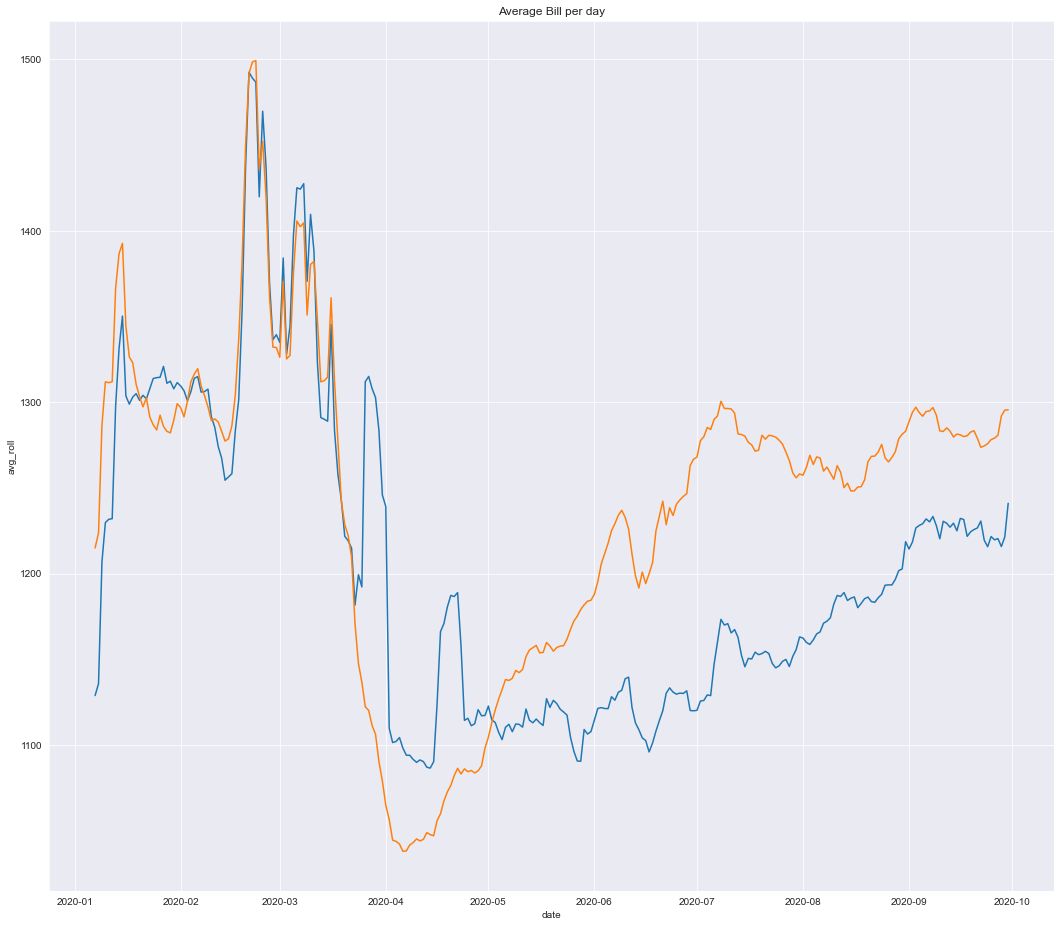

In [63]:
plt.figure(figsize=(18, 16))
plt.title('Average Bill per day')
sns.lineplot(data=avg_bill_NOpromo, x="date", y="avg_roll")
sns.lineplot(data=avg_bill_YESpromo, x="date", y="avg_roll")



*На этом графике видим, что средний чек до пандемии с промокодом и без слабо отличался ( месяца где были отличия конец января и февраль 2020). А вот после введения коронавирусных ограничений в конце марта, средний чек без промокодов сильно вырос примерно на 200 и был выше до мая 2020 года, темпы роста среднего чека после введения коронавирусных ограничений с промокодами выше чем без промокодов до августа 2020, после примерно одинаковые, но разница сохраняется, с промокодами средний чек выше.*

### Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

In [64]:
#внесем день недели в Датафрейм и посчитаем конверсию в покупку из просмотров
df_day = df.groupby('date', as_index=False)\
    .agg({'pageviews': 'sum', 'visits': 'sum', 'transactions': 'sum'})
df_day['week_day'] = df_day['date'].dt.dayofweek
df_day = df_day.assign(CR=lambda x: (x.transactions / x.pageviews) * 100).round(2)
df_day

,date,pageviews,visits,transactions,week_day,CR
0,2020-01-01,62709,21736,3107,2,4.95
1,2020-01-02,80623,27774,4208,3,5.22
2,2020-01-03,81987,28168,4260,4,5.20
3,2020-01-04,85679,29164,4549,5,5.31
4,2020-01-05,83842,28360,4498,6,5.36
...,...,...,...,...,...,...
269,2020-09-26,166479,29722,5031,5,3.02
270,2020-09-27,131042,23804,3883,6,2.96
271,2020-09-28,83607,17331,2267,0,2.71
272,2020-09-29,89271,19406,2376,1,2.66


In [65]:
# Делим датафрейм на выходные и будние дни
df_weekend_CR = df_day[(df_day.week_day > 4)]

df_weekday_CR = df_day[(df_day.week_day < 5)]

In [66]:
# Посмотрим на размер выборки по выходным дням
df_weekend_CR.shape



(78, 6)

In [67]:
# Сделаем семплирование, чтобы выровнитьь количество будних и выходных дней
df_weekday_CR_sample = df_weekday_CR.sample(n=78)

<AxesSubplot:>

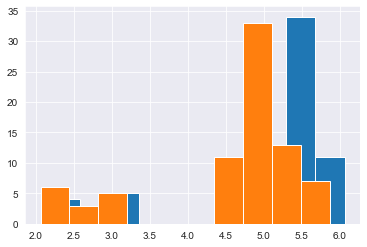

In [68]:
# Посмотрим на гистограмму
df_weekend_CR.CR.hist()
df_weekday_CR_sample.CR.hist()


*На гистограмме мы видем выбросы, посмотрим что произошло. Построим график конверсии от даты*

<AxesSubplot:xlabel='date', ylabel='CR'>

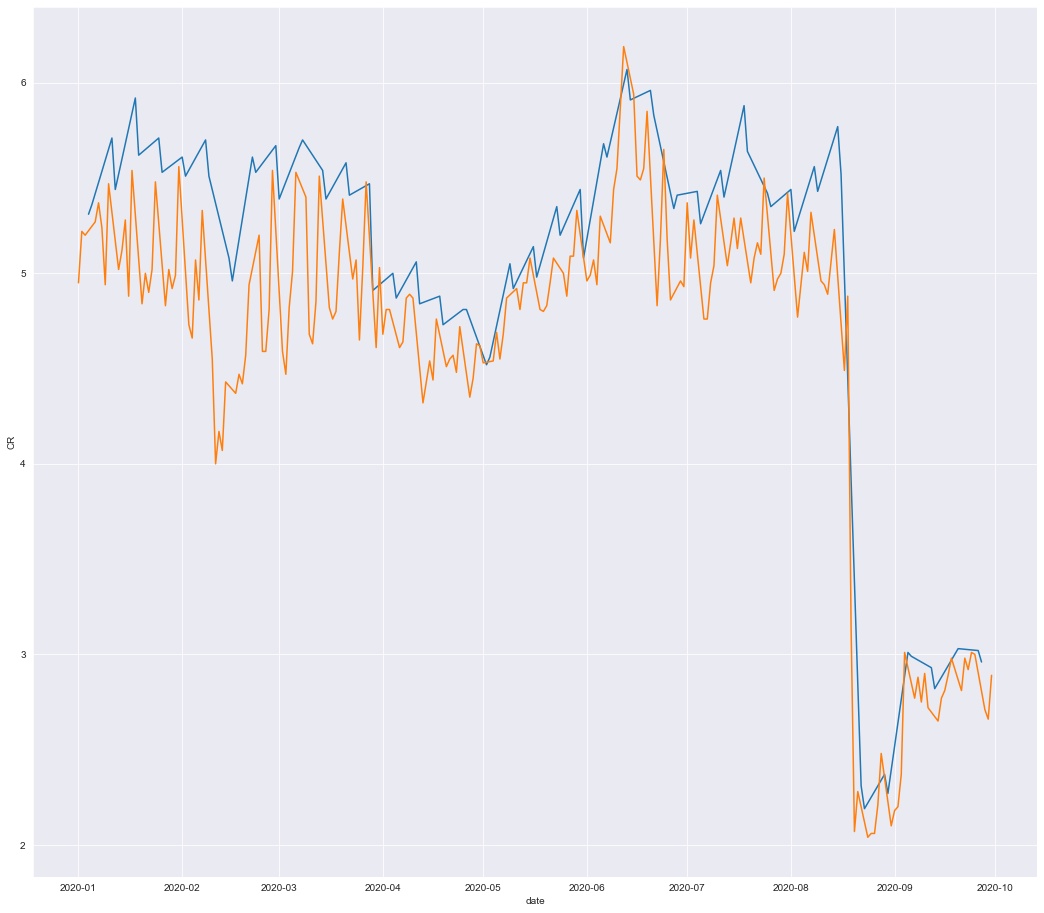

In [69]:
plt.figure(figsize=(18, 16))
sns.lineplot(data=df_weekend_CR, x='date', y='CR')
sns.lineplot(data=df_weekday_CR, x='date', y='CR')

*На графике мы видим, что что-то произошло в середине августа 2020 и коверсия резко упала. Стоит выбор учитывать ли это падение при сравнение выборки конверсий?*

<AxesSubplot:xlabel='date', ylabel='visits'>

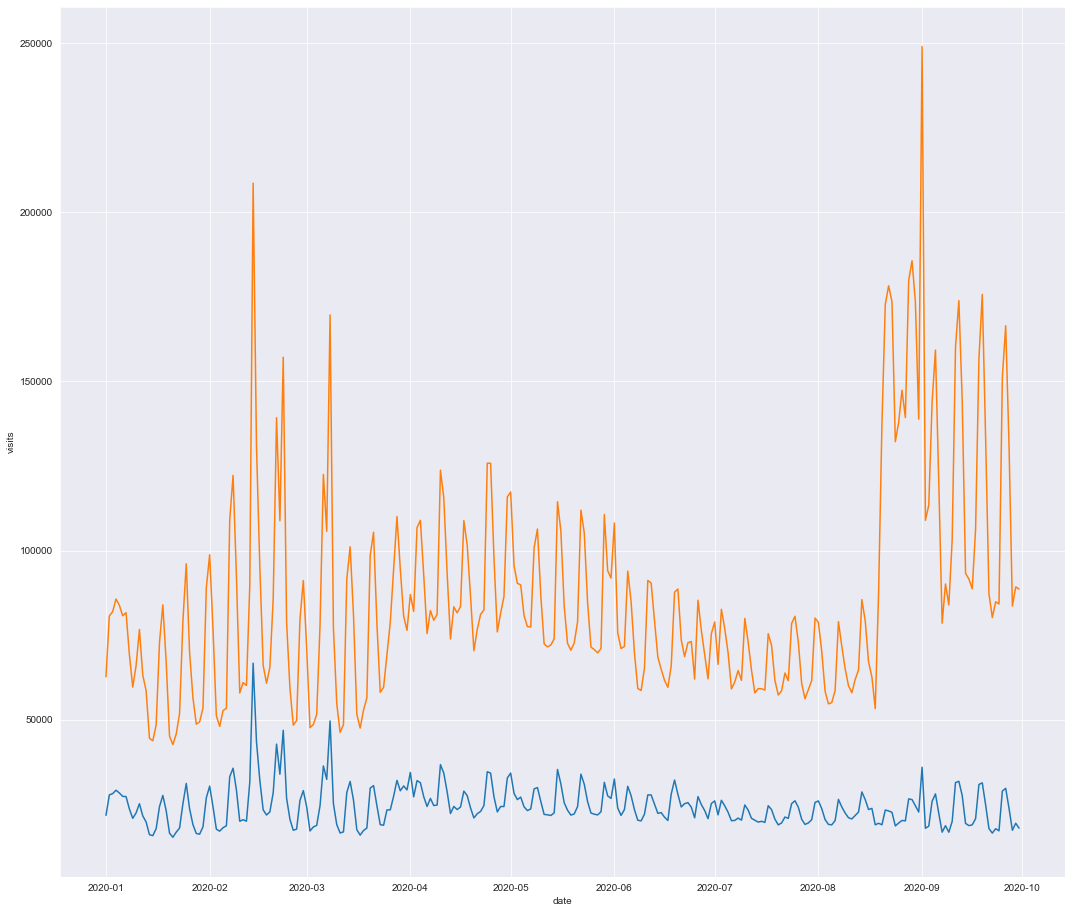

In [70]:
plt.figure(figsize=(18, 16))
sns.lineplot(data=df_day, x='date', y='visits')
sns.lineplot(data=df_day, x='date', y='pageviews')


*На графике видно, что с 19 августа возросло количество показов но число визитов не увеличилось, можно предположить реклама была настроена на нецелевую аудиторию. Следовательно эти выбросы в выборке конверсии можно исключить*

In [71]:
df_day.query('date > "2020-08-15"')

,date,pageviews,visits,transactions,week_day,CR
228,2020-08-16,67100,23459,3702,6,5.52
229,2020-08-17,62616,23798,2811,0,4.49
230,2020-08-18,53302,18939,2599,1,4.88
231,2020-08-19,87603,19397,2751,2,3.14
232,2020-08-20,137317,18957,2847,3,2.07
233,2020-08-21,172779,23304,3945,4,2.28
234,2020-08-22,178265,23043,4121,5,2.31
235,2020-08-23,173569,22630,3805,6,2.19
236,2020-08-24,132195,18618,2695,0,2.04
237,2020-08-25,137907,19463,2847,1,2.06


In [72]:
df_weekend_CR = df_weekend_CR.query('date < "2020-08-19"')
df_weekday_CR = df_weekday_CR.query('date < "2020-08-19"')

<AxesSubplot:>

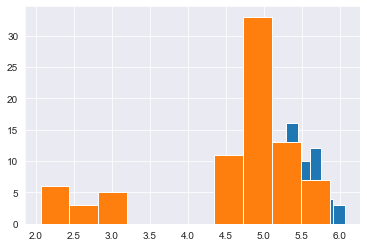

In [73]:
# Строим еще раз гистограмму
df_weekend_CR.CR.hist()
df_weekday_CR_sample.CR.hist()

##### Проверим распределение в группах с помощью теста Шапира Уилка

H0 - у групп нормальное распределение, pvalue > 0.05

In [74]:
stats.shapiro(df_weekend_CR.CR.sample(1000, replace=True, random_state=17))

ShapiroResult(statistic=0.9613912105560303, pvalue=1.328323632389535e-15)

*pvalue < 0.05 распределение не нормально*

In [75]:
stats.shapiro(df_weekday_CR.CR.sample(1000, replace=True, random_state=17))

ShapiroResult(statistic=0.9841399192810059, pvalue=5.890839815947402e-09)

*pvalue < 0.05 распределение не нормально*

##### Проверим группы непараметрическим тестом  Манн-Уитни

H0 - у групп нет статистически значимых различий, pvalue > 0.05

In [76]:
stats.mannwhitneyu(df_weekend_CR.CR, df_weekday_CR.CR)

MannwhitneyuResult(statistic=8631.0, pvalue=3.84009863367771e-12)

**pvalue < 0.05 можно с 95% увереностью утверждать, что коверсия в будние дни имеет статистически значимые различия**